In [68]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [69]:
from sklearn import ensemble, model_selection, metrics 

import numpy as np
import pandas as pd

In [70]:
titanic = pd.read_csv('titanic_train.csv')

In [71]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
titanic_target = titanic.Survived.values

In [75]:
print('Survived = 1: {:.2f}\nSurvived = 0: {:.2f}'.format(sum(titanic_target)/float(len(titanic_target)), 
                1.0 - sum(titanic_target)/float(len(titanic_target))))

Survived = 1: 0.38
Survived = 0: 0.62


In [76]:
titanic_data = titanic.iloc[:, 1:]

In [77]:
idx_col = 'PassengerId'
target_col = 'Survived'
cat_cols = ['Name', 'Cabin', 'Embarked', 'Ticket']
features_cols = list(titanic.columns)
features_cols.remove(idx_col)
features_cols.remove(target_col)
[features_cols.remove(i) for i in cat_cols]

titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if 'male' else 0)
print(features_cols)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


In [80]:
titanic_data = titanic[features_cols]
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [99]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

In [100]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_low_depth, titanic_data, 
                                                                        titanic_target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

In [101]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[ 59 178 297 415 534]
[0.74011299 0.6928839  0.70707071 0.7188755  0.72908864]
[0.68013468 0.64085297 0.66891134 0.69809203 0.71268238]


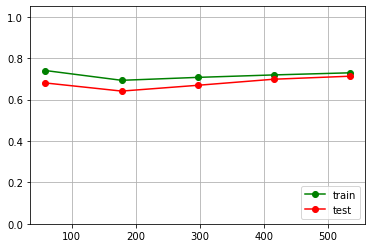

In [102]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [103]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)

In [104]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, titanic_data, 
                                                                        titanic_target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

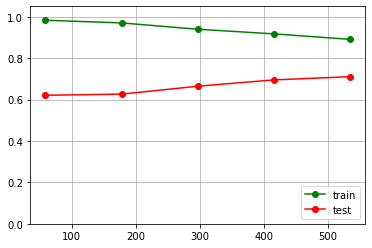

In [105]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')